# Data Analysis

In [97]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from windrose import WindroseAxes

In [59]:
# Importing the dataset
df = pd.read_csv('Kaggle_Turbine_Data.csv', parse_dates=['Observation'])
df.head()

,Observation,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [60]:
# Dropping the columns that are not required
df.drop(["Observation", "ReactivePower", "WTG"], axis=1, inplace=True)
df.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,RotorRPM,TurbineStatus,WindDirection,WindSpeed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Analysing the dataset
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,16.273495,6.574653e+07,357.000000,22.970893


In [63]:
# Analyzing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ActivePower                   94750 non-null  float64
 1   AmbientTemperatue             93817 non-null  float64
 2   BearingShaftTemperature       62518 non-null  float64
 3   Blade1PitchAngle              41996 non-null  float64
 4   Blade2PitchAngle              41891 non-null  float64
 5   Blade3PitchAngle              41891 non-null  float64
 6   ControlBoxTemperature         62160 non-null  float64
 7   GearboxBearingTemperature     62540 non-null  float64
 8   GearboxOilTemperature         62438 non-null  float64
 9   GeneratorRPM                  62295 non-null  float64
 10  GeneratorWinding1Temperature  62427 non-null  float64
 11  GeneratorWinding2Temperature  62449 non-null  float64
 12  HubTemperature                62406 non-null  float64
 13 

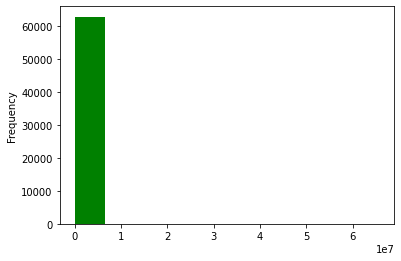

In [64]:
# Visualise distribution of data in TurbineStatus column
df['TurbineStatus'].plot.hist(color='green')
plt.show()

In [68]:
# Value counts of Turbine Status codes reported more than 50 times
df.TurbineStatus.value_counts()[df.TurbineStatus.value_counts() > 50]

2.0        55073
1.0         2159
3.0         1100
16384.0      782
512.0        286
4.0          264
8192.0       239
1024.0       225
0.0          203
27.0         155
78.0         106
52.0          88
129.0         80
103.0         65
257.0         61
180.0         57
104.0         55
Name: TurbineStatus, dtype: int64

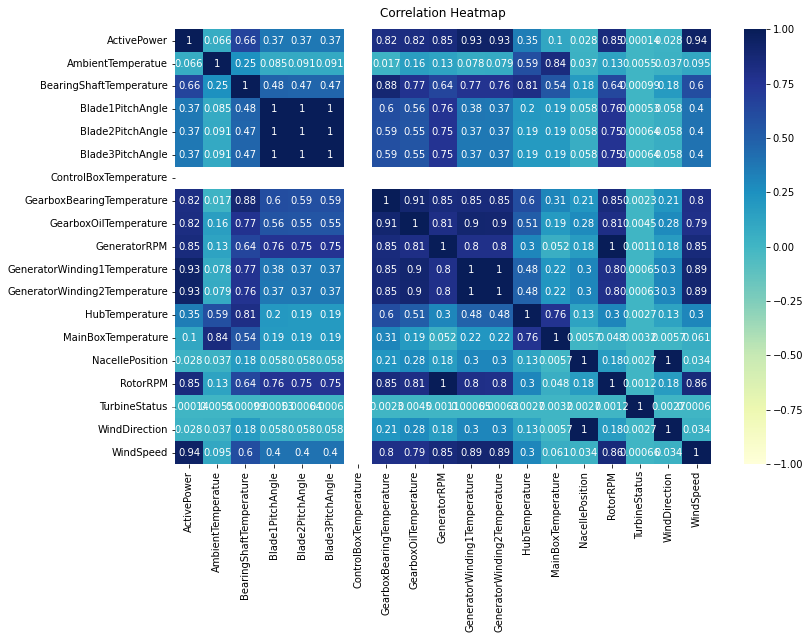

In [66]:
# Create and visualise correlation matrix
corr_matrix = df.corr().abs()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [67]:
# Count the number of missing values in each column
df.isnull().sum()

ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
RotorRPM                        56097
TurbineStatus                   55316
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [45]:
# Dropping rows with missing values
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32728 entries, 70789 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Observation                   32728 non-null  datetime64[ns, UTC]
 1   ActivePower                   32728 non-null  float64            
 2   AmbientTemperatue             32728 non-null  float64            
 3   BearingShaftTemperature       32728 non-null  float64            
 4   Blade1PitchAngle              32728 non-null  float64            
 5   Blade2PitchAngle              32728 non-null  float64            
 6   Blade3PitchAngle              32728 non-null  float64            
 7   ControlBoxTemperature         32728 non-null  float64            
 8   GearboxBearingTemperature     32728 non-null  float64            
 9   GearboxOilTemperature         32728 non-null  float64            
 10  GeneratorRPM                 

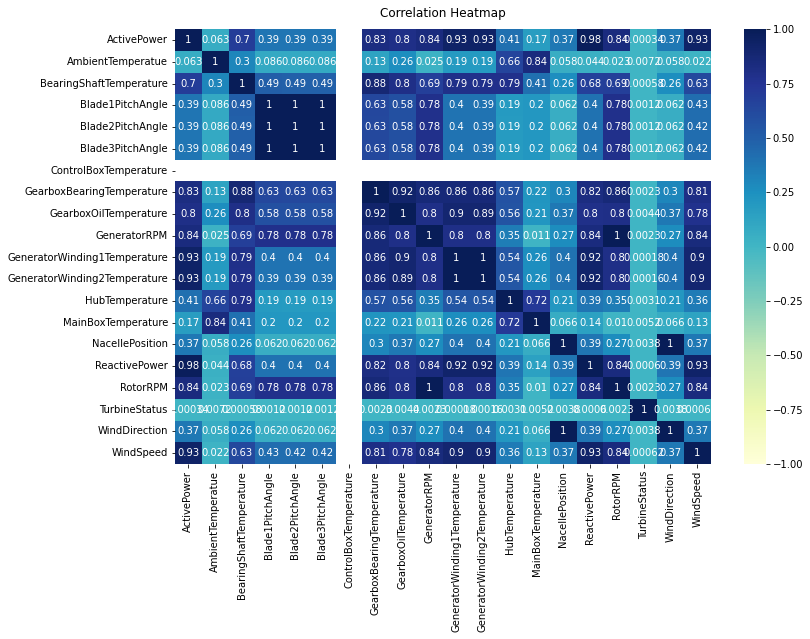

In [46]:
# Create and visualise correlation matrix
corr_matrix = df.corr().abs()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

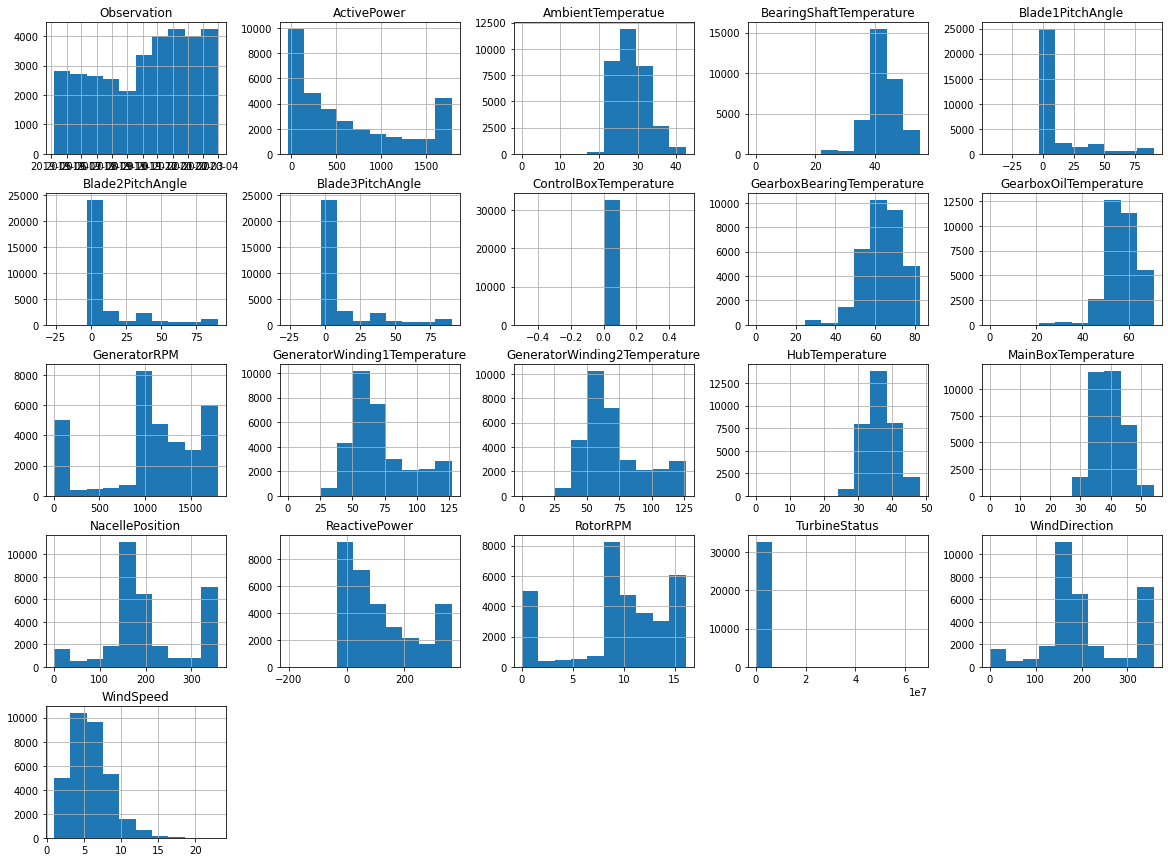

In [30]:
# Data distribution charts
df.hist(figsize=(20, 15))
plt.show()

# Regression - Predicting Active Power output

In [85]:
# Creating copy of dataset for Regression analysis
df_reg = df.copy()

In [86]:
# Function to group wind direction into 12 bins for every 30 degrees
def wind_direction(x):
    list = []
    i = 15
    while i <= 375:
        list.append(i)
        i += 30
        
    for i in list:
        if x < i:
            x = i - 15
            if x == 360:
                return 0
            else:
                return x
            
# Function to convert bins into wind rose categories
def wind_rose(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"

In [87]:
# Applying the function to WindDirection column
df_reg["WindDirection_360"] = df_reg["WindDirection"].apply(wind_direction)

In [88]:
# Checking WindDirection_360 column
df_reg.WindDirection_360.value_counts()

180.0    17131
150.0     9290
90.0      7603
330.0     6157
270.0     5649
0.0       5445
210.0     5339
300.0     4857
240.0     3774
120.0     3716
30.0      1701
60.0      1616
Name: WindDirection_360, dtype: int64

In [89]:
# Drop rows with wind speed of Null
df_reg.dropna(subset=["WindSpeed"], axis=0, inplace=True)

In [91]:
# Checking dataset values
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94595 entries, 144 to 118223
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ActivePower                   94436 non-null  float64
 1   AmbientTemperatue             93277 non-null  float64
 2   BearingShaftTemperature       61848 non-null  float64
 3   Blade1PitchAngle              41986 non-null  float64
 4   Blade2PitchAngle              41846 non-null  float64
 5   Blade3PitchAngle              41846 non-null  float64
 6   ControlBoxTemperature         61493 non-null  float64
 7   GearboxBearingTemperature     61864 non-null  float64
 8   GearboxOilTemperature         61892 non-null  float64
 9   GeneratorRPM                  61744 non-null  float64
 10  GeneratorWinding1Temperature  61883 non-null  float64
 11  GeneratorWinding2Temperature  61890 non-null  float64
 12  HubTemperature                61734 non-null  float64
 13

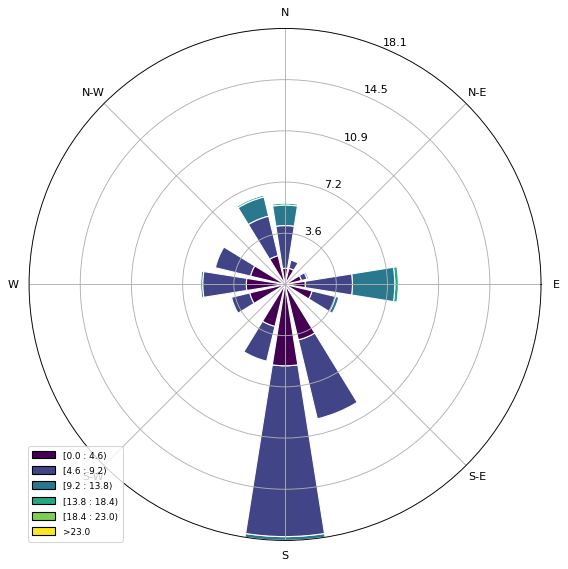

In [92]:
# Visualise Wind Speed and Wind Direction using WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df_reg["WindDirection_360"], df_reg["WindSpeed"], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

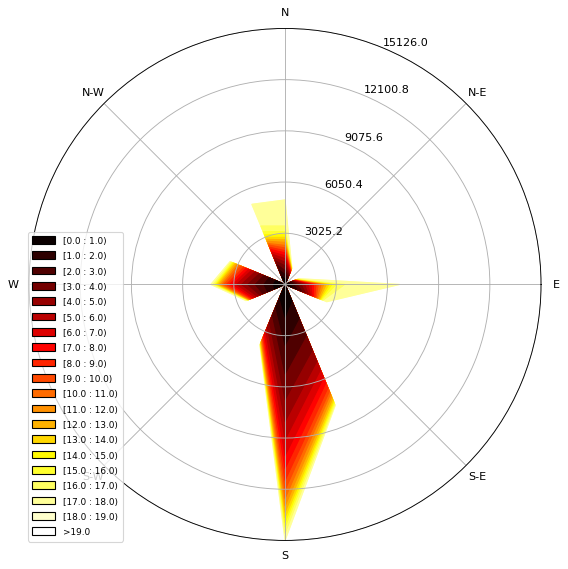

In [104]:
# Visualise Active Power and Wind Direction using WindroseAxes
ax = WindroseAxes.from_ax()
ax.contourf(df_reg["WindDirection_360"], df_reg["ActivePower"] / 100, bins=np.arange(0, 20, 1), cmap=cm.hot)
ax.set_legend()
plt.show()

In [ ]:
# Categorise Wind Direction as per above Wind Rose
df_reg["WindDirection_360"] = df_reg["WindDirection_360"].apply(wind_rose)

# Classification - Predicting Fault situation